<a href="https://colab.research.google.com/github/boniluboni/PADROES-EM-ROUBOS-E-FURTOS-DE-VEICULOS/blob/main/EDA_e_Kmeans_Roubos_e_Furtos_de_ve%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Implementação de algoritmo de clusterização na detecção de padrões em roubos e furtos de veículos </h2>

<p>
Estudo dos roubos e furtos de veículos em <strong>2021</strong> no Estado de São Paulo (dados SSP), integrado a variáveis de população e frota (IBGE) e investimentos em segurança (SEFAZ). Aplicou-se EDA, correlação de Spearman, Análise de Correspondência Simples e K-Means.
</p>

<h3>Principais achados</h3>
<ul>
  <li><strong>Concentração</strong> dos crimes em horários e dias específicos.</li>
  <li><strong>Maiores taxas</strong> de furtos/roubos em áreas de alta atividade econômica e distribuição desigual de recursos de segurança.</li>
</ul>

<h3>Conclusão</h3>
<p>
Distribuição estratégica e equitativa de investimentos é vital; variáveis socioeconômicas e demográficas devem orientar políticas de segurança.
</p>

<p><strong>Palavras-chave:</strong> Segurança pública; Análise exploratória; Clusterização.</p>


Dados obtidos do IBGE, PNAD, SSP e SEFAZ, referentes a 2021.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


In [11]:
data = {
    "HORA": list(range(24)),
    "QT_CRIMES": [342, 251, 172, 127, 167, 380, 338, 258, 222, 282, 289, 269, 324, 320, 326, 352, 404, 464, 663, 1026, 1252, 1045, 895, 609]
}

# Criar um DataFrame
df = pd.DataFrame(data)


In [12]:

# Teste de correlação e significância
correlation, correlation_p_value = spearmanr(df["HORA"], df["QT_CRIMES"])
if correlation_p_value < 0.05:
    correlation_significance = "estatisticamente significativa"
else:
    correlation_significance = "não estatisticamente significativa"

In [13]:
# Resultados e interpretações
correlation_formatted = f"{correlation:.4f}"  # Modificação aqui para formato decimal
p_value_formatted = f"{correlation_p_value:.8f}"  # Formatação do p-valor de forma mais amigável

In [14]:
# Interpretação baseada nos resultados
interpretation = ""
if correlation > 0:
    interpretation = f"Existe uma correlação positiva ({correlation_formatted}) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a aumentar. Esta correlação é {correlation_significance}, com um p-valor de {p_value_formatted}, sugerindo que a relação observada não é devido ao acaso."
else:
    interpretation = f"Existe uma correlação negativa ({correlation_formatted}) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a diminuir. Esta correlação é {correlation_significance}, com um p-valor de {p_value_formatted}, sugerindo que a relação observada não é devido ao acaso."

print(interpretation)

Existe uma correlação positiva (0.7965) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a aumentar. Esta correlação é estatisticamente significativa, com um p-valor de 0.00000321, sugerindo que a relação observada não é devido ao acaso.


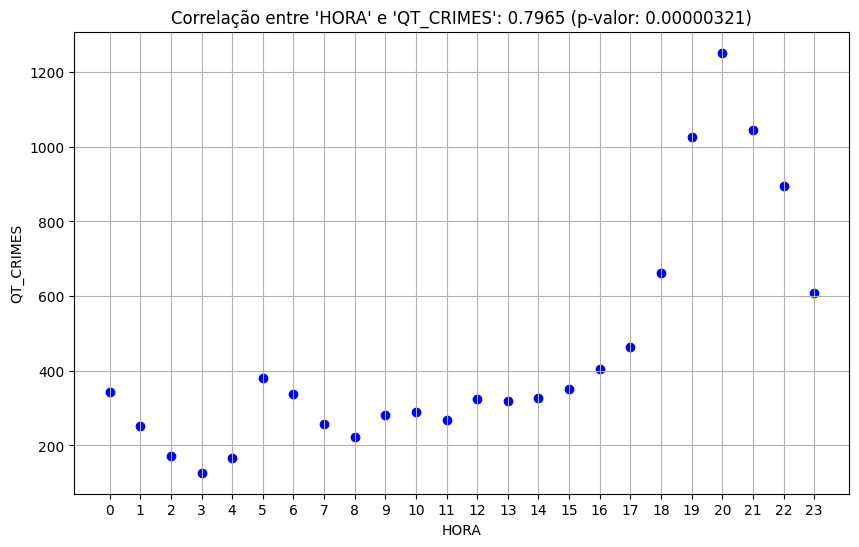

In [15]:
# Plotar os dados em um gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df["HORA"], df["QT_CRIMES"], color='b', marker='o')
plt.title(f"Correlação entre 'HORA' e 'QT_CRIMES': {correlation_formatted} (p-valor: {p_value_formatted})")  # Corrigido 'QT_OCORRENCIAS' para 'QT_CRIMES'
plt.xlabel("HORA")
plt.ylabel("QT_CRIMES")  # Corrigido 'QT_OCORRENCIAS' para 'QT_CRIMES'
plt.xticks(df["HORA"])  # Define os valores do eixo x para serem os valores de HORA
plt.grid(True)
plt.show()


In [16]:
correlation_p_value

np.float64(3.2147317367417936e-06)

In [17]:
p_value_formatted

'0.00000321'